## 1. Importing the necessary packages

In [1]:
# Importing the necessary function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#Importing & defining the datframe
df=pd.read_csv('dataset_35_dermatology.csv')
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


## 2. Basic checks

In [3]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [4]:
df.shape # DataFrame shape

(366, 35)

In [5]:
df.size # DataFrame size

12810

In [6]:
df.info() # Checking the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

### 2.1 Target Values

In [7]:
df['class'].unique() # checking the unique values of class of skin disorder

array([2, 1, 3, 5, 4, 6], dtype=int64)

## 3. Checking the null Values

In [8]:
df.isnull().sum() # Checking the null values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [9]:
#Replacing the special charecters
df.replace('?',np.nan,inplace=True)
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [10]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

### 3.1  Replacing The nulll values with mean

In [11]:
columns = ['Age']
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head() 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [12]:
df.shape

(366, 35)

In [13]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

## 4 EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

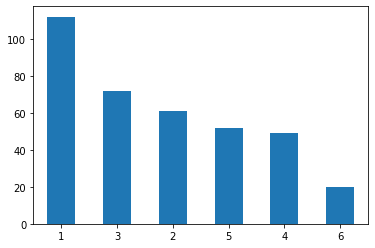

In [15]:
df['class'].value_counts().plot(kind='bar') # bar graph to represent the class counts
plt.xticks(rotation=0)
plt.show()

C:\Users\RedSeer Employee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


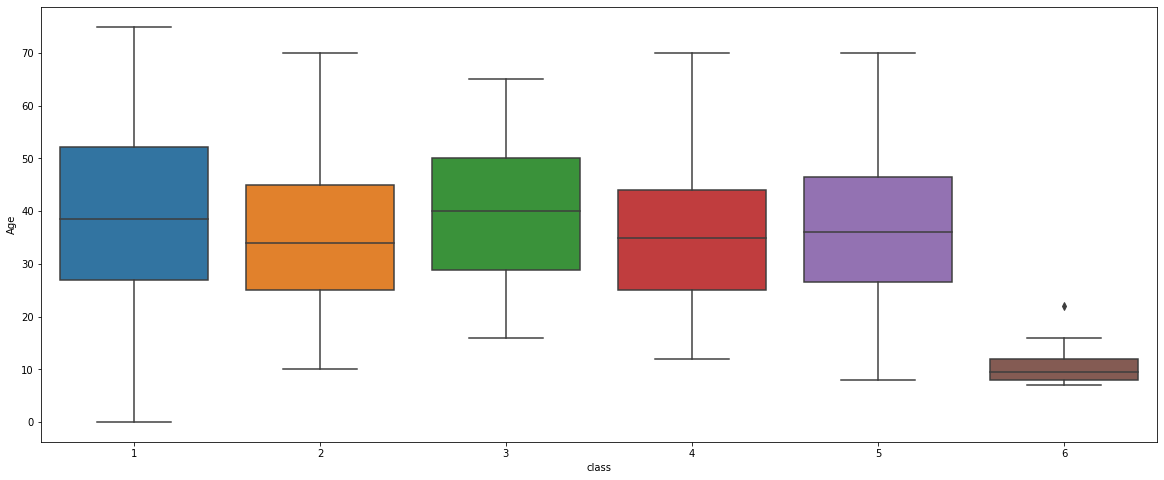

In [52]:
plt.figure(figsize=(20,8))
sns.boxplot(df['class'],df['Age'])
plt.xticks(rotation=0)
plt.show()

In [16]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.155687,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


## Task:1 Determine which features are impacting for a particular skin disorder      (for all classes)

In [17]:
df['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

### There are 6 types or class of Skin Disorder Based on below Graphs and we will check what are the important features or factor which affects the perticular type of skin disorder

# Skin Disorder CLASS-1

In [18]:
df1= df[df['class'] == 1] # extracting the Dataframe with Class-01
df1.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
10,3,3,2,1,1,0,0,0,2,2,...,0,0,0,0,0,0,1,0,20.0,1
13,2,3,3,0,0,0,0,0,1,1,...,0,0,0,0,0,0,2,0,10.0,1
17,3,3,3,0,0,0,0,0,3,3,...,3,0,0,0,0,0,2,0,38.0,1


In [19]:
df2= df1[df1.iloc[:,:34]!=0]
df2.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
1,3.0,3,3,2.0,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8.0,NaN
3,2.0,2,2,NaN,NaN,NaN,NaN,NaN,3.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,40.0,NaN
10,3.0,3,2,1.0,1.0,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,20.0,NaN
13,2.0,3,3,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,10.0,NaN
17,3.0,3,3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,...,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,38.0,NaN


In [20]:
df2.isnull().sum()

erythema                                      1
scaling                                       0
definite_borders                              0
itching                                      55
koebner_phenomenon                           63
polygonal_papules                           112
follicular_papules                          109
oral_mucosal_involvement                    112
knee_and_elbow_involvement                   23
scalp_involvement                            23
family_history                               80
melanin_incontinence                        112
eosinophils_in_the_infiltrate               109
PNL_infiltrate                               34
fibrosis_of_the_papillary_dermis            112
exocytosis                                   93
acanthosis                                    1
hyperkeratosis                               53
parakeratosis                                 1
clubbing_of_the_rete_ridges                   3
elongation_of_the_rete_ridges           

In [21]:
# Importing the Packages for Visualization
import seaborn as sns

<AxesSubplot:>

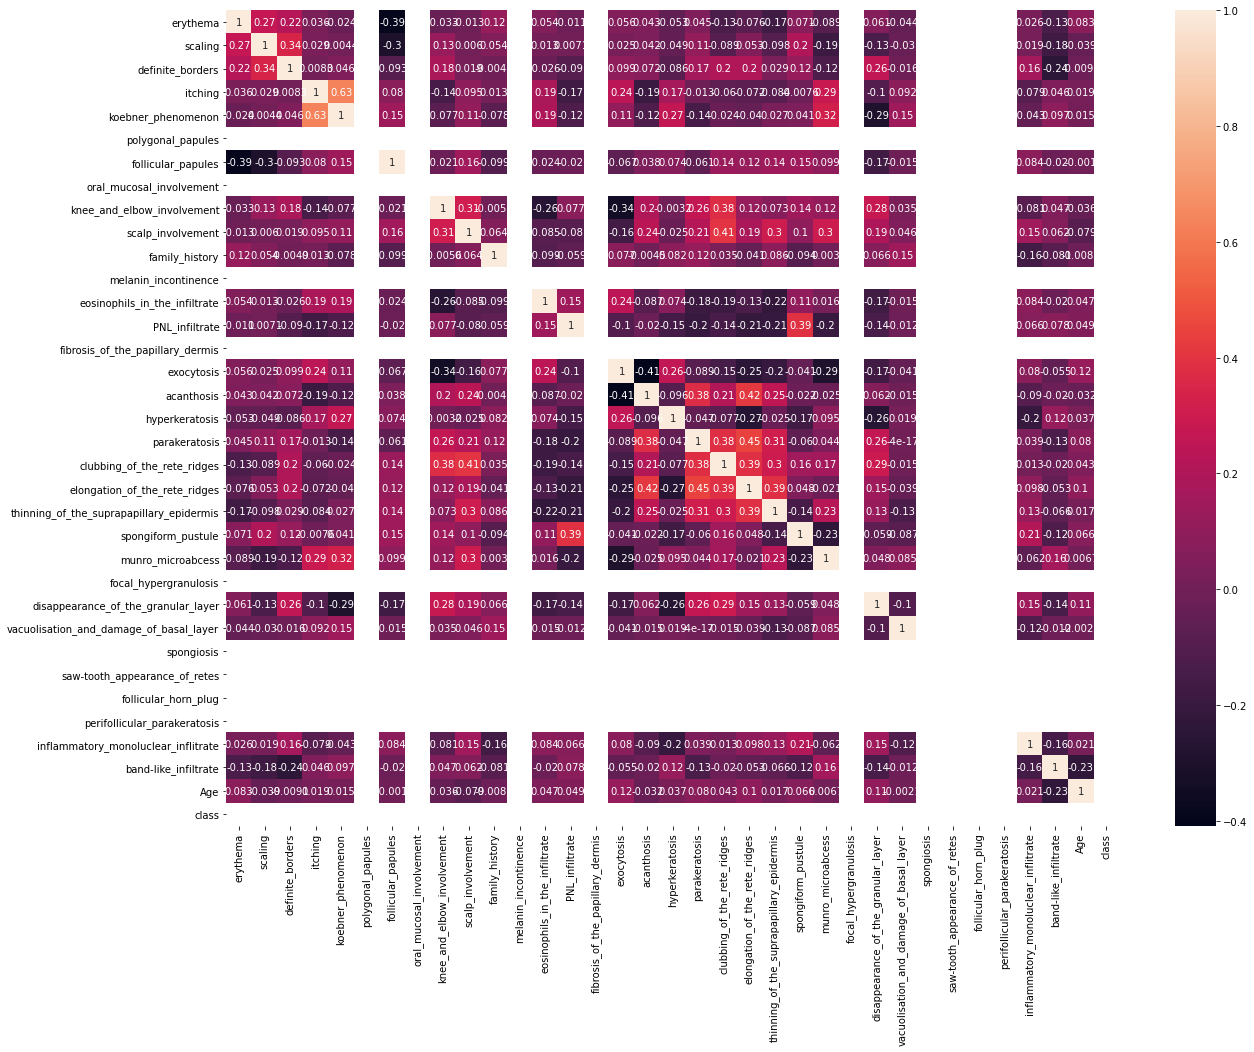

In [22]:
plt.figure(figsize=(20,15))# plotting heatmap to check the corerelation of data with particular class
sns.heatmap(df1.corr(),annot=True)

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-1
- Erythema
- Scaling                                       
- Definite_borders  
- Follicular_papules
- Family_history
- Clubbing_of_the_rete_ridges 
- Thinning_of_the_suprapapillary_epidermis
- Band-like_infiltrate

# Skin Disorder CLASS-2

In [23]:
df3= df[df['class'] == 2] # extracting the Dataframe with Class-02
df3

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
11,2,2,0,3,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,21.0,2
12,3,3,1,2,0,0,0,0,0,1,...,0,0,2,0,0,0,1,0,22.0,2
16,2,2,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2,2,2,1,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,70.0,2
285,3,2,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,22.0,2
286,2,3,2,1,0,0,0,0,0,0,...,0,0,3,0,0,0,3,0,45.0,2
359,2,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,40.0,2


<AxesSubplot:>

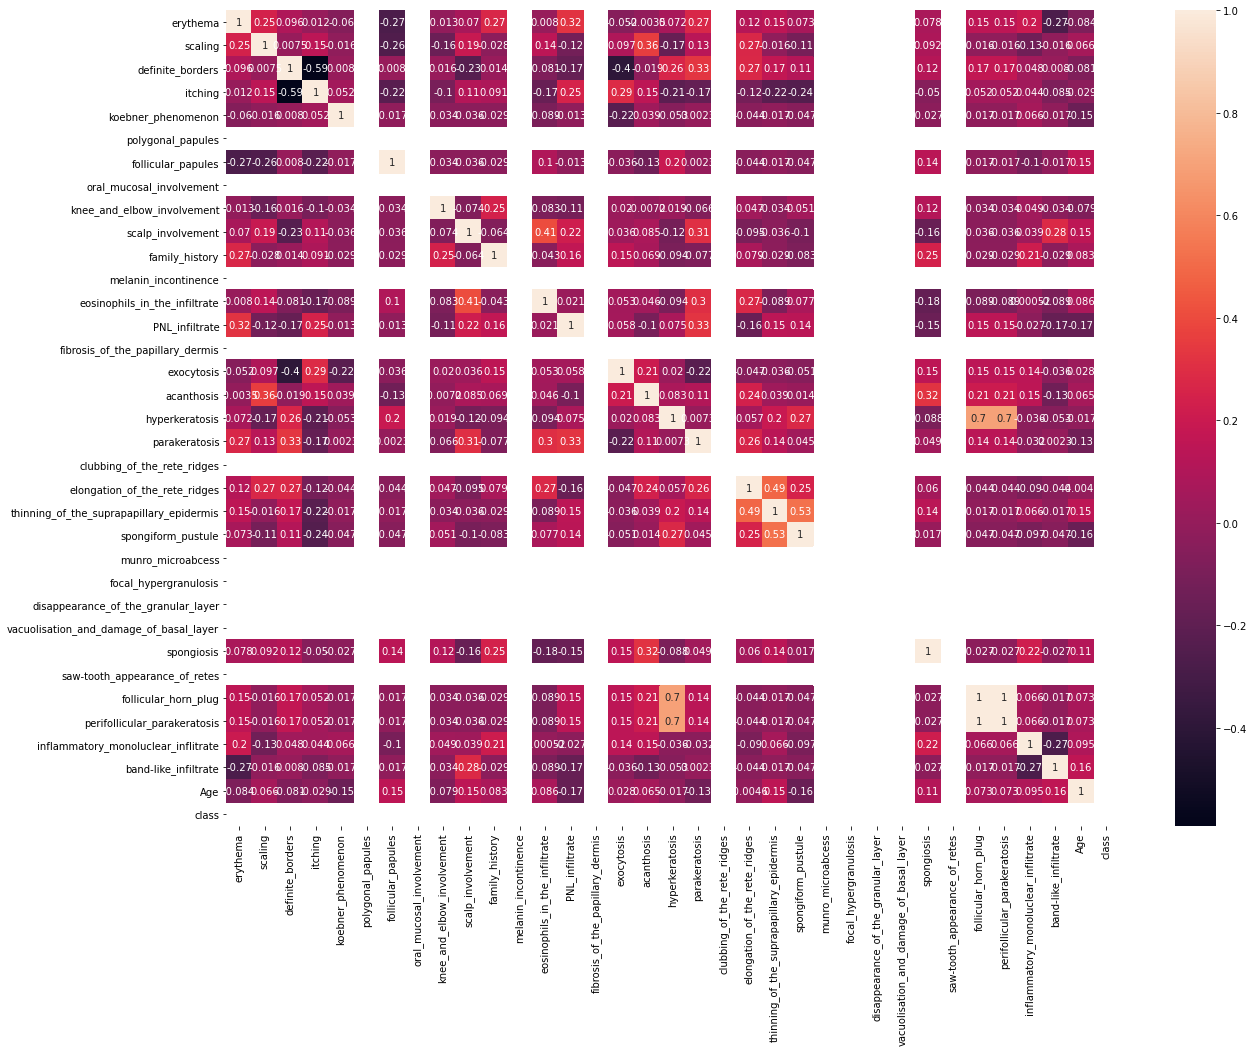

In [24]:
plt.figure(figsize=(20,15))# plotting heatmap to check the corerelation of data with particular class
sns.heatmap(df3.corr(),annot=True)

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-2
- Follicular_papules
- Scaling
- Follicular_horn_plug
- Perifollicular_parakeratosis
- Inflammatory_monoluclear_inflitrate
- Band-like_infiltrate
- Erythema
- Elongation_of_the_rete_ridges
- Thinning_of_the_suprapapillary_epidermis
- Parakeratosis
- PNL_infiltrate
- Family_history

# Skin Disorder CLASS-3

In [25]:
df4= df[df['class'] == 3] # extracting the Dataframe with Class-03
df4.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
14,2,2,3,3,0,3,0,2,0,0,...,0,3,0,3,0,0,1,3,65.0,3
18,2,1,3,3,3,3,0,0,2,0,...,0,2,0,3,0,0,2,3,23.0,3


<AxesSubplot:>

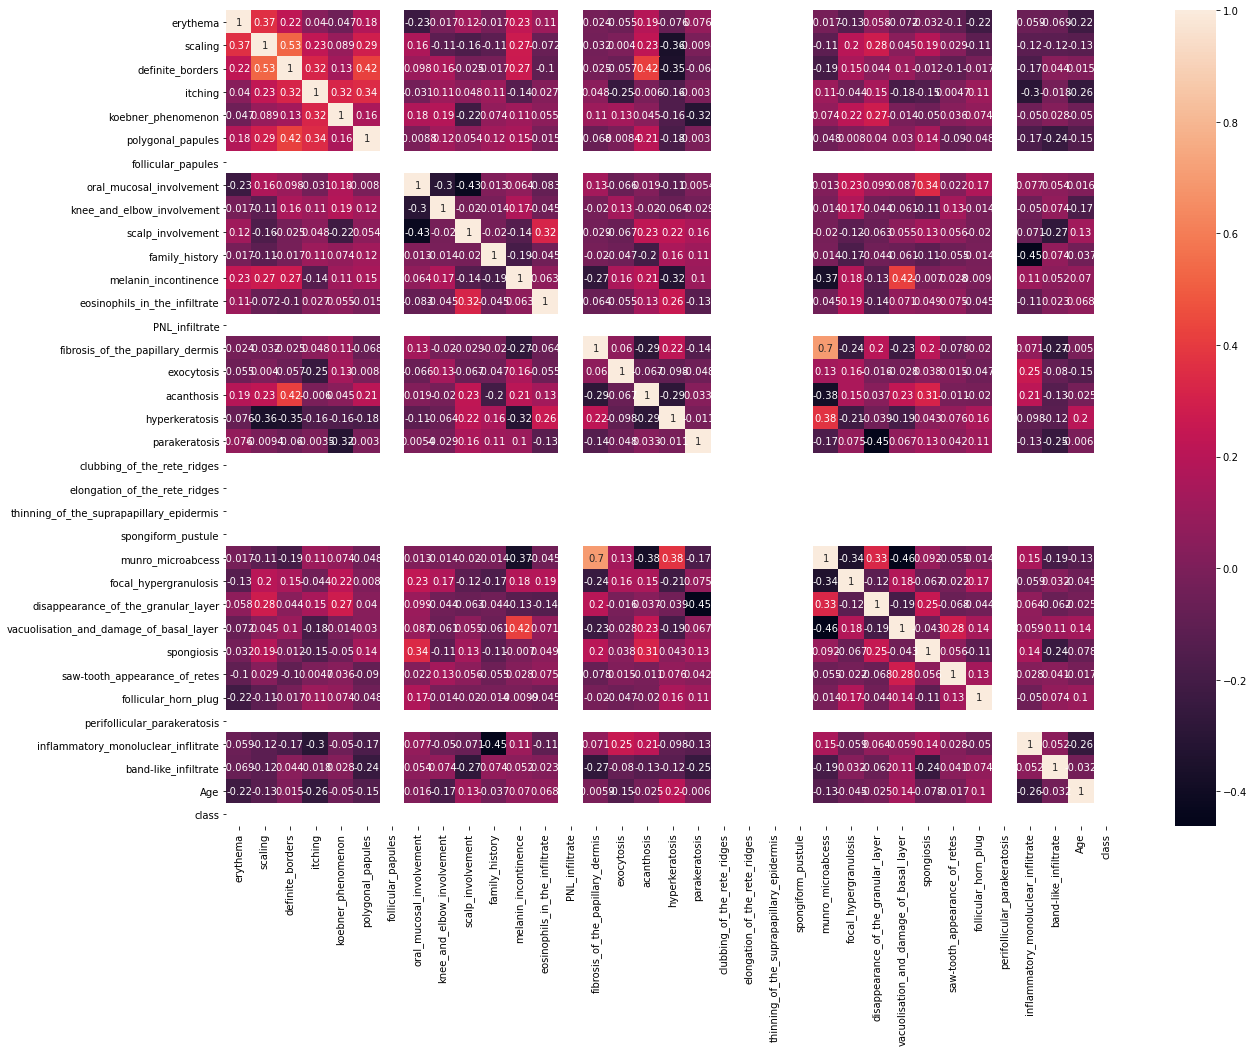

In [26]:
plt.figure(figsize=(20,15)) # plotting heatmap to check the corerelation of data with particular class
sns.heatmap(df4.corr(),annot=True)

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-3
- Definite_borders
- Scaling
- Erythema
- Polygonal_papules
- Oral_mucosal_involvement
- Scalp_involvement
- Melanin_incontinence
- Eosinophils_in_the_infiltrate
- Acanthosis 
- Focal_hypergranulosis
- Saw-tooth_appearance_of_retes
- Follicular_horn_plug

# Skin Disorder CLASS-4

In [27]:
df5= df[df['class'] == 4] # extracting the Dataframe with Class-04
df5.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.000000,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.000000,4
15,1,1,0,1,3,0,0,0,0,0,...,0,0,2,0,0,0,2,0,40.000000,4
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36.296089,4
41,1,1,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,62.000000,4


<AxesSubplot:>

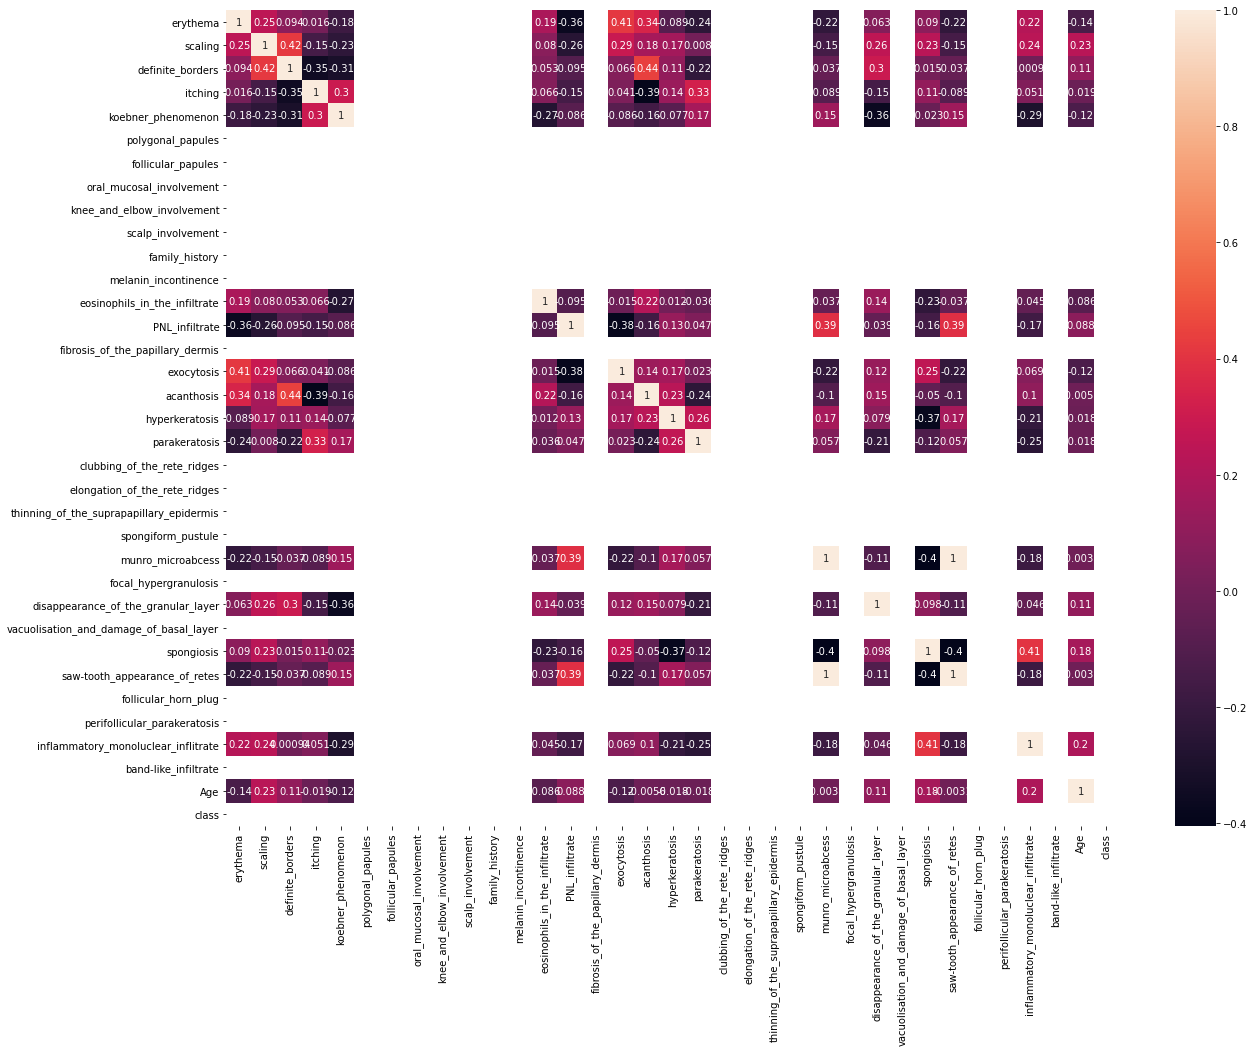

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df5.corr(),annot=True) # plotting heatmap to check the corerelation of data with particular class

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-4
- scaling
- koebner_phenomenon
- PNL_infiltrate
- exocytosis
- acanthosis
- parakeratosis
- munro_microabcess
- saw-tooth_appearance_of_retes
- inflammatory_monoluclear_inflitrate

# Skin Disorder CLASS-5

In [29]:
df6= df[df['class'] == 5] # extracting the Dataframe with Class-05
df6.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
19,1,1,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,17.0,5
22,2,2,0,2,0,0,0,0,0,0,...,0,0,1,0,1,0,2,0,42.0,5
24,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,22.0,5
27,1,2,2,3,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,17.0,5


<AxesSubplot:>

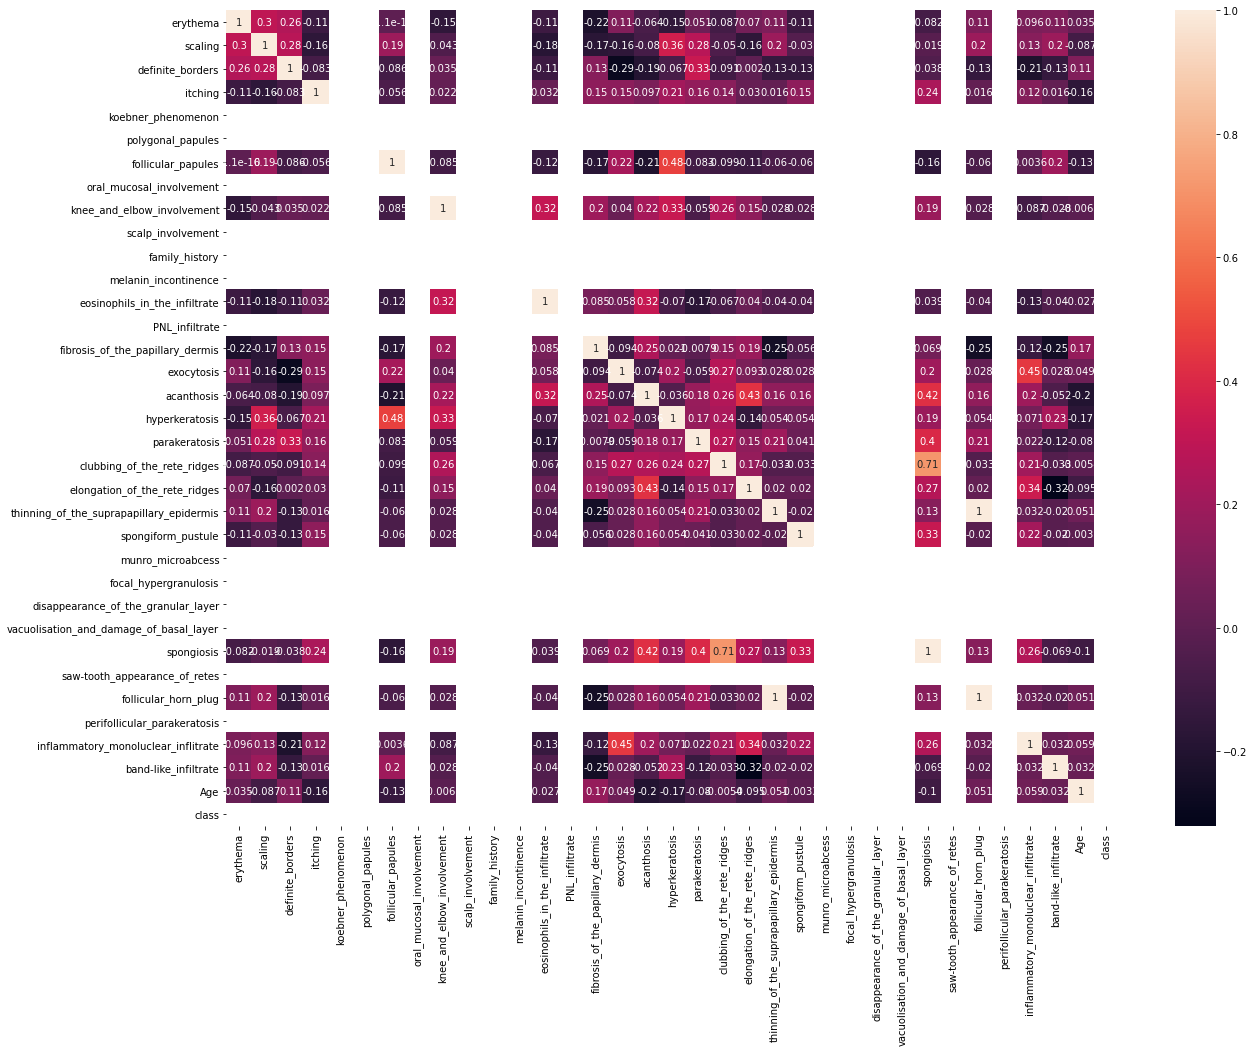

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df6.corr(),annot=True)# plotting heatmap to check the corerelation of data with particular class

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-5
- scaling
- definite_borders
- itching
- knee_and_elbow_involvement
- eosinophils_in_the_infiltrate
- fibrosis_of_the_papillary_dermis
- exocytosis
- hyperkeratosis
- thinning_of_the_suprapapillary_epidermis
- spongiform_pustule

# Skin Disorder CLASS-6

In [31]:
df7 = df[df['class'] == 6] # extracting the Dataframe with Class-06
df7.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
20,2,1,1,2,0,0,3,0,1,2,...,0,0,0,0,1,2,1,0,8.0,6
26,1,1,0,1,0,0,3,0,1,0,...,0,0,1,0,2,2,1,0,10.0,6
47,2,1,1,1,0,0,2,0,3,2,...,0,0,0,0,0,1,1,1,12.0,6
60,2,2,1,1,0,0,1,0,1,1,...,0,0,1,0,1,1,1,0,8.0,6
71,2,1,2,0,0,0,3,0,3,0,...,0,0,0,0,3,3,0,0,13.0,6


<AxesSubplot:>

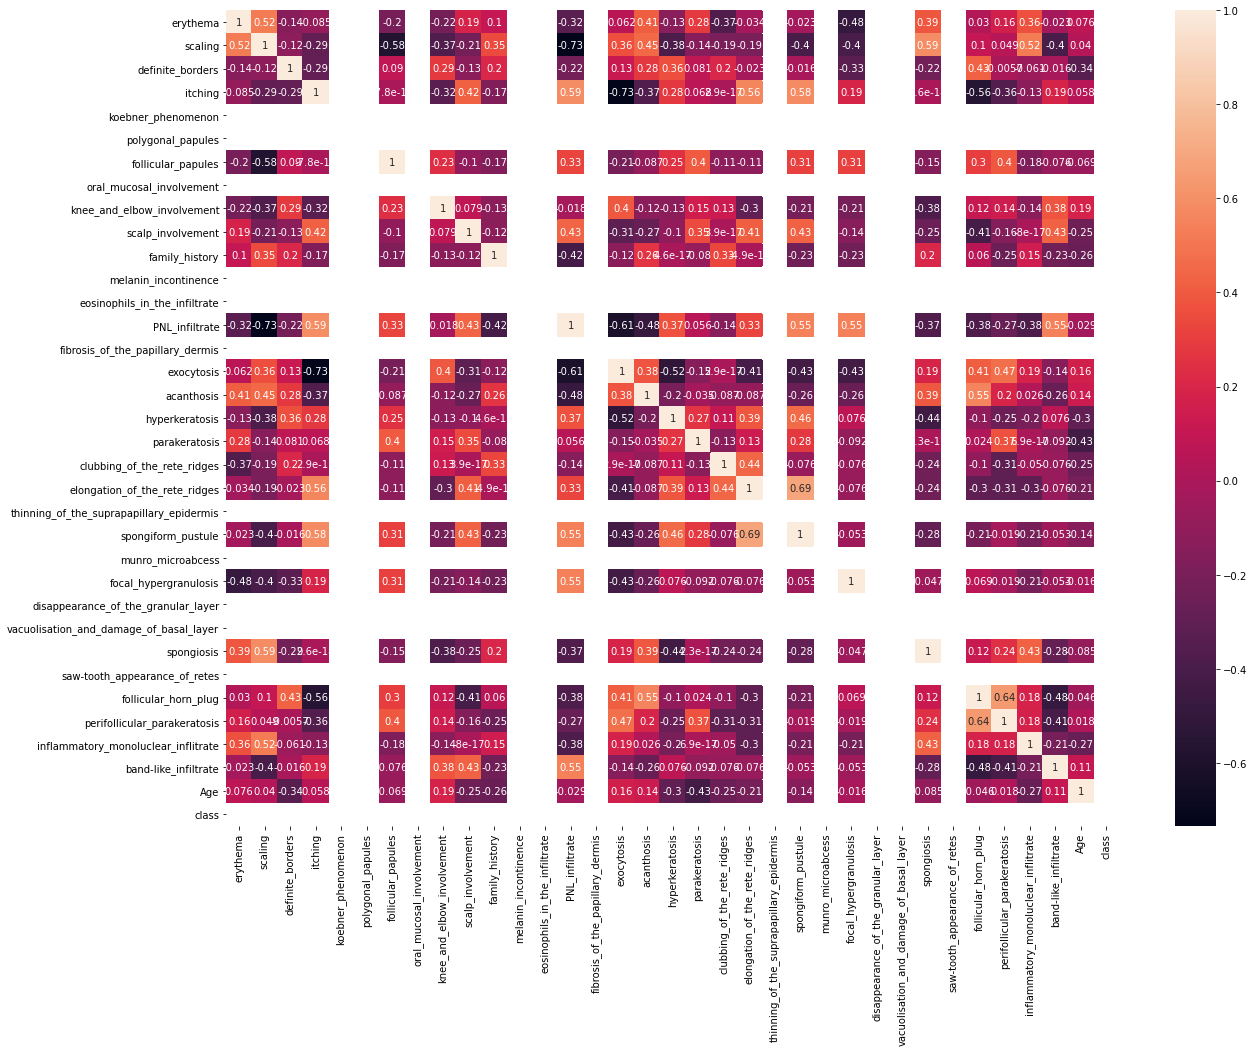

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df7.corr(),annot=True) # plotting heatmap to check the corerelation of data with particular class

### Based on the above Graph we can say these factor mostly affect Skin disorder of Class-5
- scaling
- follicular_papules
- knee_and_elbow_involvement
- scalp_involvement
- PNL_infiltrate
- acanthosis
- parakeratosis
- clubbing_of_the_rete_ridges
- focal_hypergranulosis
- spongiosis
- inflammatory_monoluclear_inflitrate

## Task2:-Creating a machine learning model which will predict the disorder available

### 4.1 Defining the Values of  'X','y'

In [33]:
X = df.iloc[:,:34]
y=df['class']

In [34]:
X.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [35]:
y.head()

0    2
1    1
2    3
3    1
4    3
Name: class, dtype: int64

# 5. Model-1 => K-Nearest Neighbors

In [36]:
#Importing the packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [38]:
X_train.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
173,3,3,3,0,0,0,0,0,2,0,...,0,2,0,0,0,0,0,2,0,18.0
148,2,2,2,0,2,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,30.0
176,3,2,3,0,0,0,0,0,2,2,...,0,2,0,0,0,0,0,2,0,33.0
153,2,2,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,52.0
354,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,56.0


In [39]:
y_train.head(5)

173    1
148    4
176    1
153    1
354    5
Name: class, dtype: int64

### 5.1 Defining and training the model

In [46]:
model=KNeighborsClassifier() #Defining the model
model.fit(X_train,y_train) # Training the model
y_predict= model.predict(X_test)

### 5.2 Model Evaluation

In [47]:
accuracy_score(y_test,y_predict)

0.8108108108108109

In [48]:
print(classification_report(y_test,y_predict)) # Classification report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.80      0.44      0.57        18
           3       1.00      1.00      1.00        15
           4       0.31      0.62      0.42         8
           5       1.00      0.89      0.94         9
           6       0.75      1.00      0.86         3

    accuracy                           0.81        74
   macro avg       0.81      0.83      0.80        74
weighted avg       0.87      0.81      0.82        74



In [49]:
confusion_matrix(y_test,y_predict) # Confusion matrix

array([[21,  0,  0,  0,  0,  0],
       [ 0,  8,  0, 10,  0,  0],
       [ 0,  0, 15,  0,  0,  0],
       [ 0,  2,  0,  5,  0,  1],
       [ 0,  0,  0,  1,  8,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

### 5.3.Model Evaluation with Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=10,scoring="accuracy")
print(scores)

[0.91891892 0.81081081 0.81081081 0.86486486 0.89189189 0.89189189
 0.88888889 0.88888889 0.97222222 0.83333333]


In [51]:
print("Average Accuracy:",scores.mean())
print("Std:",scores.std())
#std of < 0.05 is good.

Average Accuracy: 0.8772522522522523
Std: 0.04729282833169962


## The Avarage accuracy Score of K-Nearest Neighbors model with Cross_val is = 0.87725           

Please prefer other notebooks for different models